# SPARK Data Preprocessing Pipe

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [3]:
label_mapping = {0: "Healthy", 1: "Parkinson's", 2: "Other Movement Disorder"}

In [4]:
df = pd.read_csv('../raw_data/merged_dfq.csv')

In [5]:
df = df.drop(columns = 'Unnamed: 0')

In [6]:
df.shape
df.columns
df.resource_type.unique()

array(['patient'], dtype=object)

In [7]:
data_clean = df.copy()
data_clean.columns

Index(['subject_id', 'study_id_x', 'questionnaire_name', 'questionnaire_id',
       '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', 'resource_type', 'id', 'study_id_y',
       'condition', 'disease_comment', 'age_at_diagnosis', 'age', 'height',
       'weight', 'gender', 'handedness', 'appearance_in_kinship',
       'appearance_in_first_grade_kinship', 'effect_of_alcohol_on_tremor',
       'label'],
      dtype='object')

In [8]:
columns_to_drop = ['study_id_x', 'study_id_y',
                   'questionnaire_id', 'id',
                    'questionnaire_name', 'resource_type',
                    'appearance_in_first_grade_kinship',
                   'disease_comment', 'condition', 'effect_of_alcohol_on_tremor']

In [9]:
data_clean = data_clean.drop(columns= columns_to_drop)
data_clean


,subject_id,01,02,03,04,05,06,07,08,09,...,29,30,age_at_diagnosis,age,height,weight,gender,handedness,appearance_in_kinship,label
0,280,False,False,True,False,True,False,True,True,False,...,False,False,73,77,162,65,female,right,False,2
1,146,False,True,False,False,False,False,False,True,True,...,False,False,68,71,186,89,male,right,True,1
2,453,False,False,False,False,False,False,False,False,False,...,False,False,0,48,164,59,female,right,False,2
3,3,False,False,False,False,False,False,False,False,False,...,False,False,45,45,170,78,female,right,False,0
4,392,True,False,True,False,False,False,False,True,False,...,False,False,48,55,165,64,female,right,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,169,False,False,False,False,True,False,False,True,True,...,False,False,51,56,180,82,female,right,True,1
465,186,True,False,True,True,True,False,False,True,True,...,True,True,60,65,160,73,female,right,False,1
466,352,False,True,True,False,False,False,False,True,True,...,False,False,45,55,172,80,female,right,True,1
467,217,True,False,False,False,False,False,False,True,True,...,False,False,65,73,182,85,male,right,False,1


,subject_id,01,02,03,04,05,06,07,08,09,...,29,30,age_at_diagnosis,age,height,weight,gender,handedness,appearance_in_kinship,label
2,453,False,False,False,False,False,False,False,False,False,...,False,False,0,48,164,59,female,right,False,2
94,242,False,True,False,False,False,False,False,True,True,...,False,False,0,59,175,105,male,right,False,1
135,434,False,False,False,False,False,False,False,False,False,...,False,False,0,75,162,52,female,right,False,2
142,176,False,False,False,True,False,False,False,False,True,...,False,False,0,43,168,110,female,right,False,2
155,117,False,True,False,False,False,False,False,True,True,...,False,False,0,82,172,76,male,right,False,2
174,195,False,False,False,False,False,False,False,False,False,...,True,False,0,57,182,87,male,right,False,2
222,462,False,False,False,False,False,False,False,False,False,...,False,False,0,58,160,75,female,right,False,2
228,120,False,False,False,False,True,True,True,False,False,...,False,False,0,67,175,75,male,right,False,1
238,321,False,False,False,False,False,False,False,False,True,...,False,False,0,66,162,62,female,right,False,2
266,322,False,True,True,False,True,False,True,False,True,...,False,True,0,59,184,98,male,right,False,1


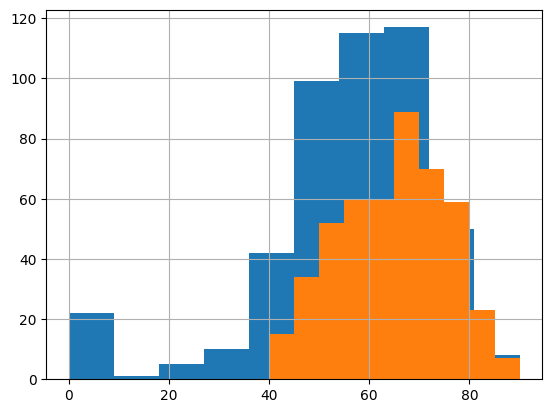

In [10]:
data_clean.age_at_diagnosis.hist()
data_clean.age.hist()
#data_clean[data_clean['age_at_diagnosis']==0,]
data_clean[data_clean['age_at_diagnosis']==0]

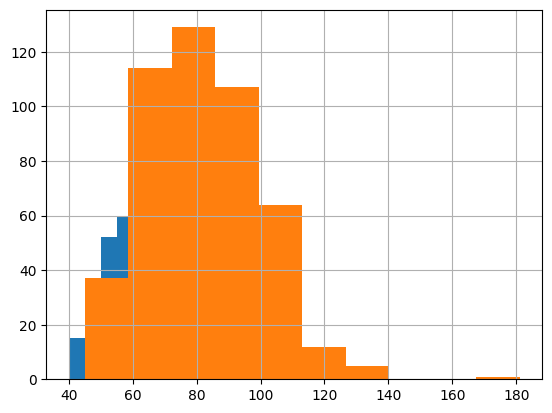

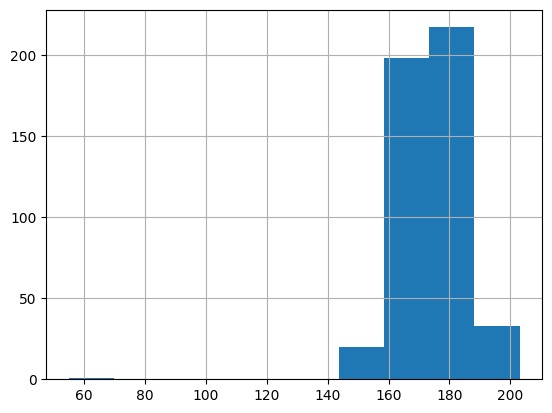

<Figure size 640x480 with 0 Axes>

In [11]:
data_clean.age.hist()
data_clean.weight.hist()
plt.show()
data_clean.height.hist(bins = 10)
plt.show()
plt.tight_layout()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   weight  469 non-null    int64
 1   height  469 non-null    int64
dtypes: int64(2)
memory usage: 7.5 KB


<Axes: >

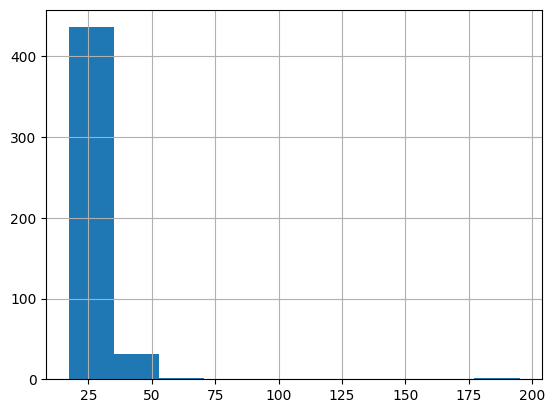

In [12]:
#Feature engineering
#BMI weight (kg) / [height (m)]²
data_clean['bmi'] = (data_clean.weight)/((data_clean.height/100)**2)
data_clean.loc[:,['weight', 'height']].info()
data_clean.bmi.hist()

In [13]:
mask = data_clean['age_at_diagnosis']==0
data_clean.loc[mask,'age_at_diagnosis'] = data_clean.loc[mask,'age']

In [14]:
features = data_clean.drop(columns = ['subject_id','label']).columns
features
y = data_clean['label']

<Axes: >

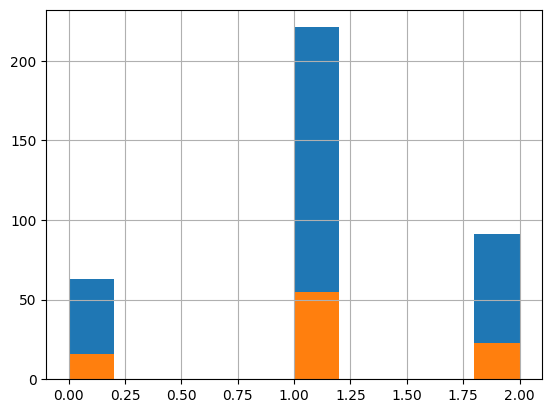

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
data_clean[features], y, test_size=0.20, random_state=42, stratify = y)
y_train.hist()
y_test.hist()

In [16]:
X_train.shape
X_train.columns = features
X_train.head()

,01,02,03,04,05,06,07,08,09,10,...,29,30,age_at_diagnosis,age,height,weight,gender,handedness,appearance_in_kinship,bmi
53,False,True,False,False,False,False,False,False,False,True,...,True,False,52,62,185,111,male,right,False,32.432432
15,True,False,True,False,False,False,False,True,False,False,...,False,False,54,58,170,63,female,right,False,21.799308
273,False,False,False,False,False,False,False,False,False,False,...,False,False,68,68,180,88,male,right,False,27.160494
125,False,False,False,False,True,False,False,True,True,False,...,False,False,68,75,176,69,male,right,True,22.275310
35,True,True,True,False,True,True,False,True,True,False,...,False,False,46,54,191,98,male,left,False,26.863299


In [17]:
encoder = OneHotEncoder(drop = 'if_binary')
r_scaler = RobustScaler()
mm_scaler = MinMaxScaler()

In [18]:
data_to_rscale = ['age_at_diagnosis', 'age', 'height', 'weight']
data_to_mmscale = ['bmi']
data_to_encode = data_clean.drop(columns = ['age_at_diagnosis', 'age',
                                            'height', 'weight','bmi','subject_id','label']).columns
column_prep = ColumnTransformer(transformers=[
        ("robust", r_scaler, data_to_rscale),
        ("mm", mm_scaler, data_to_mmscale),
        ("enc",encoder, data_to_encode)
    ])

X_train_prep= column_prep.fit_transform(X_train[features])

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_prep, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
X_test_prep = column_prep.transform(X_test[features])

In [21]:
y_pred = knn.predict(X_test_prep)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

Balanced Accuracy: 0.55


In [24]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier())
])

grid = GridSearchCV(
    pipeline,
    param_grid={
        'knn__n_neighbors': [3, 5, 7],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean', 'manhattan']
    },
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='balanced_accuracy'
)

grid.fit(X_train_prep, y_train)


,estimator,Pipeline(step...lassifier())])
,param_grid,"{'knn__metric': ['euclidean', 'manhattan'], 'knn__n_neighbors': [3, 5, ...], 'knn__weights': ['uniform', 'distance']}"
,scoring,'balanced_accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,sampling_strategy,'auto'


In [25]:
best_knn = grid.best_estimator_
best_knn

,steps,"[('smote', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,n_neighbors,7
,weights,'distance'
,algorithm,'auto'
,leaf_size,30


In [26]:
y_pred = best_knn.predict(X_test_prep)

score = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {score:.2f}")


Balanced Accuracy: 0.52


In [47]:
#Stacking
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(n_estimators=100, class_weight='balanced')),
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced')),
    ('xgb', XGBClassifier(eval_metric='mlogloss')),
]
#define meta model
meta_model = LogisticRegression(max_iter=1000)

#stacking classifier
stacked_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

#pipeline with SMOTE
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('stack', stacked_clf)
])

#Train 
pipeline.fit(X_train_prep, y_train)

,steps,"[('smote', ...), ('stack', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,estimators,"[('knn', ...), ('rf', ...), ...]"
,final_estimator,LogisticRegre...max_iter=1000)
,cv,5
,stack_method,'auto'


In [48]:
# evaluate
y_pred = pipeline.predict(X_test_prep)

score = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {score:.2f}")

Balanced Accuracy: 0.60


In [50]:
# grid search CV stack model
#base models
base_models = [
    ('knn', KNeighborsClassifier()),
    ('rf', RandomForestClassifier(class_weight='balanced')),
    ('xgb', XGBClassifier(eval_metric='mlogloss'))
]

#meta model
meta_model = LogisticRegression(max_iter=1000, class_weight='balanced')

#Stacking classifier
stacked_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)
#pipeline with SMOTE
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('stack', stacked_clf)
])

#Grid search CV ove base model hyper params
param_grid = {
    'stack__knn__n_neighbors': [3, 5, 7],
    'stack__rf__n_estimators': [100, 200],
    'stack__rf__max_depth': [None, 10, 20],
    'stack__xgb__learning_rate': [0.05, 0.1],
    'stack__xgb__max_depth': [3, 6]
}
 #Grid search CV with balanced accuracy
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='balanced_accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train_prep, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,estimator,Pipeline(step... n_jobs=-1))])
,param_grid,"{'stack__knn__n_neighbors': [3, 5, ...], 'stack__rf__max_depth': [None, 10, ...], 'stack__rf__n_estimators': [100, 200], 'stack__xgb__learning_rate': [0.05, 0.1], ...}"
,scoring,'balanced_accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,sampling_strategy,'auto'


In [52]:
best_model = grid.best_estimator_
best_model

,steps,"[('smote', ...), ('stack', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,estimators,"[('knn', ...), ('rf', ...), ...]"
,final_estimator,LogisticRegre...max_iter=1000)
,cv,5
,stack_method,'auto'


In [53]:
y_pred = best_model.predict(X_test_prep)
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.2f}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Balanced Accuracy: 0.57
[[ 9  5  2]
 [ 1 51  3]
 [ 4 14  5]]
              precision    recall  f1-score   support

           0       0.64      0.56      0.60        16
           1       0.73      0.93      0.82        55
           2       0.50      0.22      0.30        23

    accuracy                           0.69        94
   macro avg       0.62      0.57      0.57        94
weighted avg       0.66      0.69      0.65        94



In [ ]:
#stacked base model without SMOTE & Grid search CV

#base models
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(n_estimators=100, class_weight='balanced')),
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced')),
    ('xgb', XGBClassifier(eval_metric='mlogloss')),
]
#define meta model
meta_model = LogisticRegression(max_iter=1000)

#stacking classifier
stacked_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

#pipeline with SMOTE
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('stack', stacked_clf)
])

#Train 
pipeline.fit(X_train_prep, y_train)


In [ ]:
#stacked base model with Grid Search CV & without SMOTE
#stacked model with both SMOTE & Grid search CV
#Stacked model with random search cv